In [1]:
import pandas as pd

In [2]:
obs = pd.read_hdf(
    'clean_data.h5',
    'obs',
)

In [3]:
obs.shape

(1426881, 63)

In [4]:
obs.columns.tolist()

['gbifID',
 'identifier',
 'license',
 'modified',
 'references',
 'rightsHolder',
 'occurrenceID',
 'catalogNumber',
 'recordedBy',
 'eventDate',
 'eventTime',
 'year',
 'month',
 'day',
 'verbatimEventDate',
 'countryCode',
 'stateProvince',
 'verbatimLocality',
 'decimalLatitude',
 'decimalLongitude',
 'coordinateUncertaintyInMeters',
 'identificationID',
 'identifiedBy',
 'dateIdentified',
 'taxonID',
 'acceptedNameUsageID',
 'scientificName',
 'phylum',
 'class',
 'order',
 'family',
 'genus',
 'genericName',
 'specificEpithet',
 'taxonRank',
 'taxonomicStatus',
 'publishingCountry',
 'lastInterpreted',
 'issue',
 'mediaType',
 'hasCoordinate',
 'hasGeospatialIssues',
 'taxonKey',
 'acceptedTaxonKey',
 'phylumKey',
 'classKey',
 'orderKey',
 'familyKey',
 'genusKey',
 'speciesKey',
 'species',
 'acceptedScientificName',
 'verbatimScientificName',
 'lastParsed',
 'repatriated',
 'level0Gid',
 'level0Name',
 'level1Gid',
 'level1Name',
 'level2Gid',
 'level2Name',
 'iucnRedListCateg

In [33]:
# Number of unique species within observations
taxon_vc = obs["scientificName"].value_counts()
taxon_vc

Amanita muscaria (L.) Lam.                                         30491
Trametes versicolor (L.) Lloyd                                     24549
Xanthoria parietina (L.) Beltr., 1858                              21646
Cerioporus squamosus (Huds.) Quél.                                 20033
Coprinus comatus (O.F.Müll.) Pers.                                 20009
                                                                   ...  
Wallemia mellicola S.Jančič, H.D.T.Nguyen, Seifert & Gunde-Cim.        1
Baorangia rufomaculata (Both) Raspé & Vadthanarat                      1
Pseudocercospora musicola U.Braun                                      1
Gymnopilus crociphyllus (Sacc.) Pegler                                 1
Lachnella Fr.                                                          1
Name: scientificName, Length: 12924, dtype: int64

<AxesSubplot: >

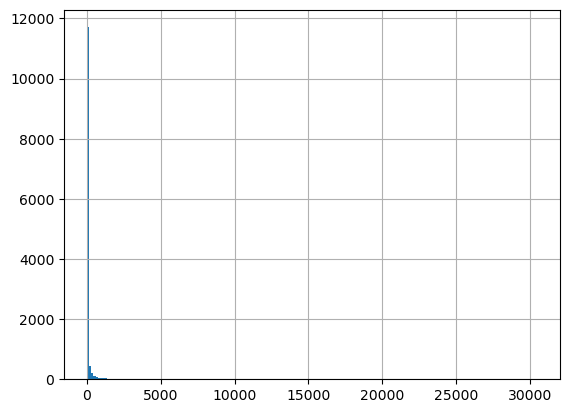

In [34]:
# Distribution of observations per species

# obs['taxonID'].hist() # <-- not a very good depction as taxonID is not a numerical value
taxon_vc.sort_values().hist( bins = 200 )
# x axis is essetially meaningless? but this does show the distribution of value counts

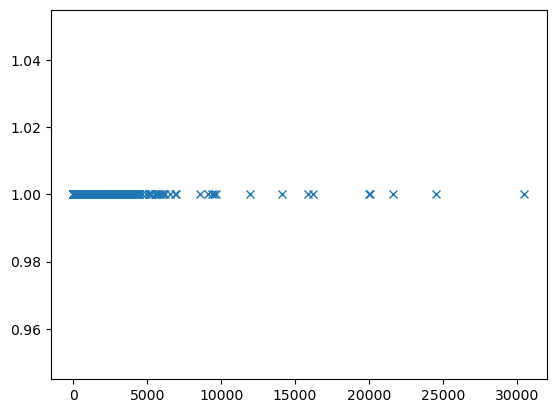

In [35]:
# plot counts on a 1D line graph
import matplotlib.pyplot as pp
pp.plot(taxon_vc, len(taxon_vc) * [1], "x")  # is there a way to do a 1-dimensional plot within pandas?

In [36]:
taxon_vc[ taxon_vc > 5000 ].shape

(32,)

In [37]:
taxon_vc[ taxon_vc > 10000 ].shape

(9,)

In [38]:
taxon_vc[ taxon_vc < 5000 ].shape # note the '<' (less than)

(12892,)

In [39]:
taxon_vc[ taxon_vc > 2500 ].shape

(109,)

In [40]:
taxon_vc[ taxon_vc > 1000 ].shape

(304,)

* First of all, how would I better show this distribution? a histogram sorted by value? there would be too many indiviual items in the x dimension. Also, I 
* It looks like there are only 32 species with more than 5000 observations, which is OK.
  * How many observations per species do we need? Assume one observation equates to 1-4 images of the species (actual data is in the 'multimedia.txt' TSV file which I have yet to explore)
    * This should answer the question of: "How many species can we effectively include in our model?"